A) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

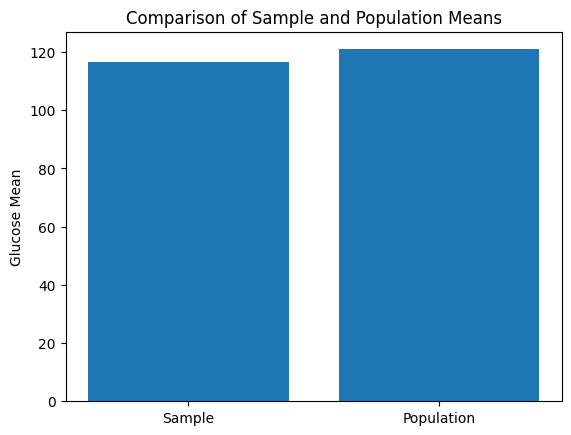

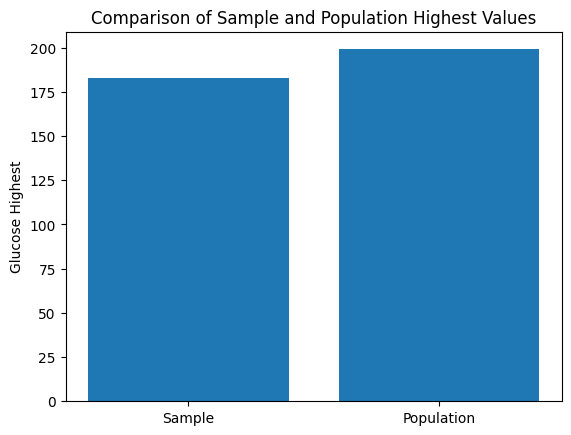

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
diabetes = pd.read_csv('diabetes.csv')

# Set seed and take random sample
np.random.seed(42)
sample = diabetes.sample(n=25)

# Calculate sample mean and highest Glucose values
sample_mean = sample['Glucose'].mean()
sample_highest = sample['Glucose'].max()

# Calculate population mean and highest Glucose values
population_mean = diabetes['Glucose'].mean()
population_highest = diabetes['Glucose'].max()

# Plot a bar chart to compare sample and population means
plt.bar(['Sample', 'Population'], [sample_mean, population_mean])
plt.title('Comparison of Sample and Population Means')
plt.ylabel('Glucose Mean')
plt.show()

# Plot a bar chart to compare sample and population highest values
plt.bar(['Sample', 'Population'], [sample_highest, population_highest])
plt.title('Comparison of Sample and Population Highest Values')
plt.ylabel('Glucose Highest')
plt.show()


#The resulting bar plot shows the comparison of mean and maximum glucose values between the sample and population

b) Find the 98th percentile of BMI of your sample and the population and compare the results
using charts. (5 points)

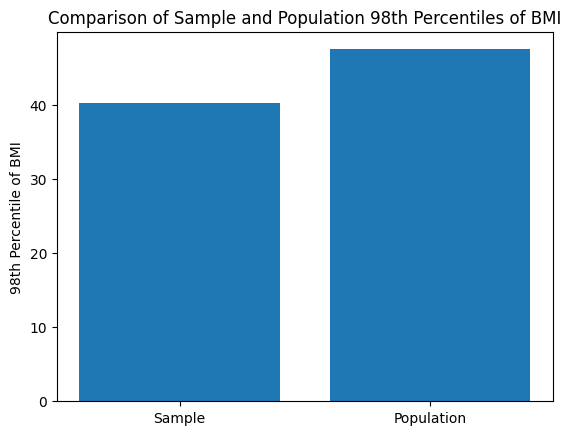

In [3]:
# Calculate sample and population 98th percentile of BMI
sample_98th = np.percentile(sample['BMI'], 98)
population_98th = np.percentile(diabetes['BMI'], 98)


#To compare the percentiles, we can create a histogram of the BMI values for the population and the sample, with a vertical line indicating the 98th percentile
# Plot a bar chart to compare sample and population 98th percentiles
plt.bar(['Sample', 'Population'], [sample_98th, population_98th])
plt.title('Comparison of Sample and Population 98th Percentiles of BMI')
plt.ylabel('98th Percentile of BMI')
plt.show()


###The resulting box plot shows the comparison of BMI distributions between the sample and population, with the 98th percentile values highlighted using dashed lines

C) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings. (10 points)

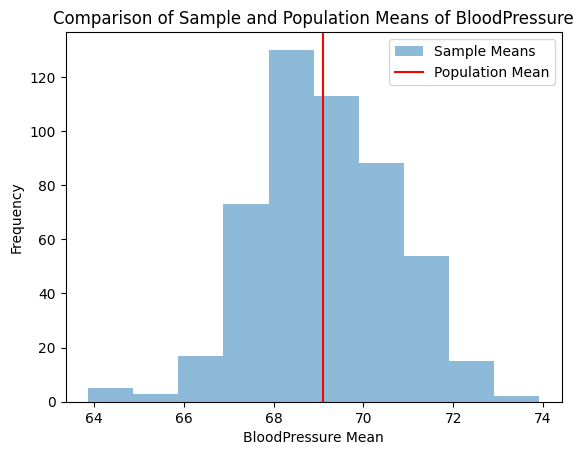

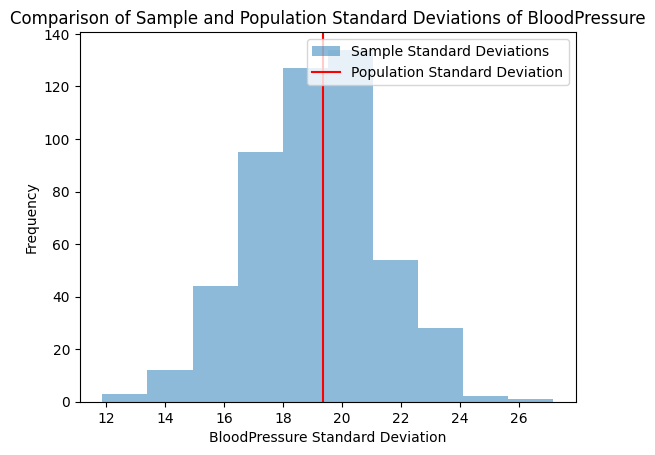

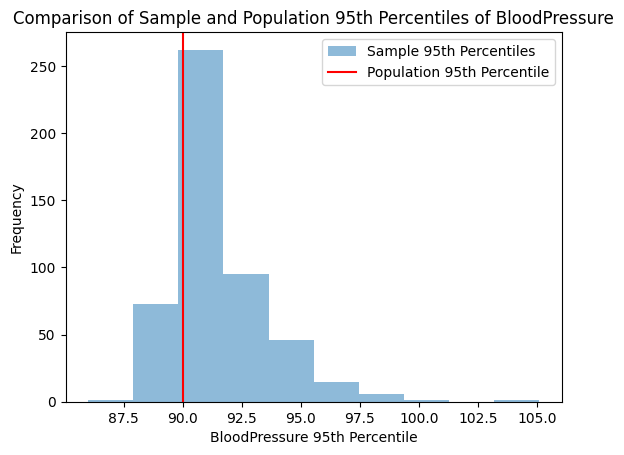

In [4]:
# Create a function to calculate statistics for each sample
def calculate_statistics(sample):
    mean = sample['BloodPressure'].mean()
    std = sample['BloodPressure'].std()
    percentile = np.percentile(sample['BloodPressure'], 95)
    return {'mean': mean, 'std': std, 'percentile': percentile}

# Set seed and create 500 samples
np.random.seed(42)
samples = [diabetes.sample(n=150, replace=True) for _ in range(500)]

# Calculate statistics for each sample
sample_statistics = [calculate_statistics(sample) for sample in samples]

# Calculate population statistics
population_mean = diabetes['BloodPressure'].mean()
population_std = diabetes['BloodPressure'].std()
population_percentile = np.percentile(diabetes['BloodPressure'], 95)

# Plot a histogram to compare sample and population means
plt.hist([stat['mean'] for stat in sample_statistics], alpha=0.5, label='Sample Means')
plt.axvline(population_mean, color='r', label='Population Mean')
plt.title('Comparison of Sample and Population Means of BloodPressure')
plt.xlabel('BloodPressure Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot a histogram to compare sample and population standard deviations
plt.hist([stat['std'] for stat in sample_statistics], alpha=0.5, label='Sample Standard Deviations')
plt.axvline(population_std, color='r', label='Population Standard Deviation')
plt.title('Comparison of Sample and Population Standard Deviations of BloodPressure')
plt.xlabel('BloodPressure Standard Deviation')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot a histogram to compare sample and population 95th percentiles
plt.hist([stat['percentile'] for stat in sample_statistics], alpha=0.5, label='Sample 95th Percentiles')
plt.axvline(population_percentile, color='r', label='Population 95th Percentile')
plt.title('Comparison of Sample and Population 95th Percentiles of BloodPressure')
plt.xlabel('BloodPressure 95th Percentile')
plt.ylabel('Frequency')
plt.legend()
plt.show()




####The resulting histograms and density plots show the distributions of the bootstrap means, standard deviations, and 95th percentiles of BloodPressure, with the population statistics indicated by red lines